In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [197]:
R = 100
C = 0.000001
fc = 1/(2*np.pi*R*C)
print("Frecuencia de Corte Teórica (Hz):",fc)

Frecuencia de Corte Teórica (Hz): 1591.5494309189535


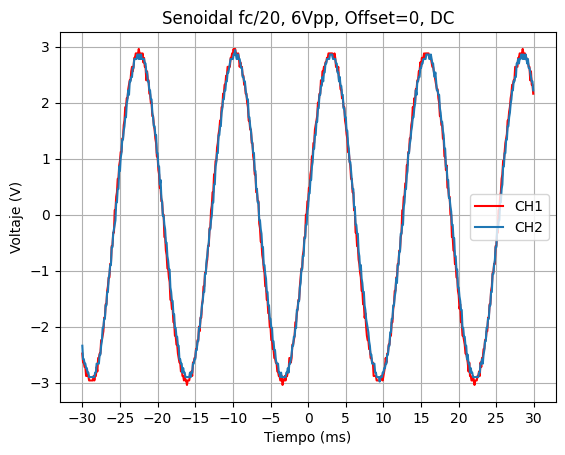

In [198]:
data12 = pd.read_csv("NewFile14.csv", skiprows=1)
data12.drop(data12.columns[3], axis=1, inplace=True)
t = data12.iloc[:,0]*1000
v1 = data12.iloc[:,1]
v2 = data12.iloc[:,2]-0.1
# rojo es CH1, azul es CH2
plt.plot(t,v1,color="red",label="CH1")
plt.plot(t,v2,label="CH2")
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.xlabel("Tiempo (ms)")
plt.ylabel("Voltaje (V)")
plt.title("Senoidal fc/20, 6Vpp, Offset=0, DC")
plt.legend()
plt.grid(True)
plt.show()

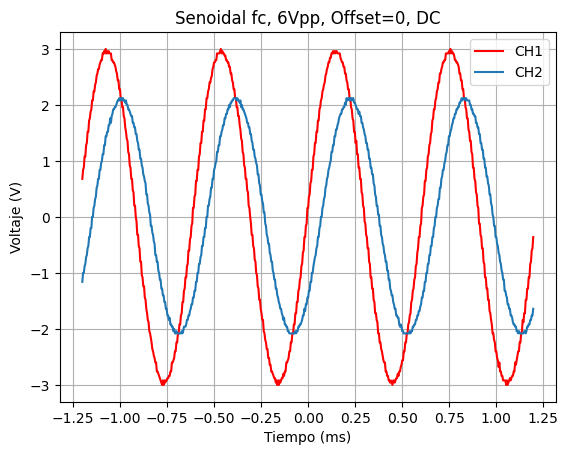

In [199]:
# fc experimental es cuando Vpp de salida es 0.7071*Vpp de entrada
data15 = pd.read_csv("NewFile15.csv", skiprows=1)
data15.drop(data15.columns[3], axis=1, inplace=True)
t = data15.iloc[:,0]*1000
v1 = data15.iloc[:,1]
v2 = data15.iloc[:,2]
# rojo es CH1, azul es CH2
plt.plot(t,v1,color="red",label="CH1")
plt.plot(t,v2,label="CH2")
plt.gca().xaxis.set_major_locator(MultipleLocator(0.25))
plt.xlabel("Tiempo (ms)")
plt.ylabel("Voltaje (V)")
plt.title("Senoidal fc, 6Vpp, Offset=0, DC")
plt.legend()
plt.grid(True)
plt.show()

In [200]:
Vpp_CH1 = (np.max(v1)-np.min(v1))
Vpp_CH2 = (np.max(v2)-np.min(v2))
print("Vpp medida a la entrada(V):",Vpp_CH1)
print("En f=fc la Vpp de la salida debería ser (V):",Vpp_CH1*(1/np.sqrt(2)))
print("Vpp medida a la salida(V):", Vpp_CH2)
print("Frecuencia de corte Experimental: 1645 Hz")

Vpp medida a la entrada(V): 6.0
En f=fc la Vpp de la salida debería ser (V): 4.242640687119285
Vpp medida a la salida(V): 4.2
Frecuencia de corte Experimental: 1645 Hz


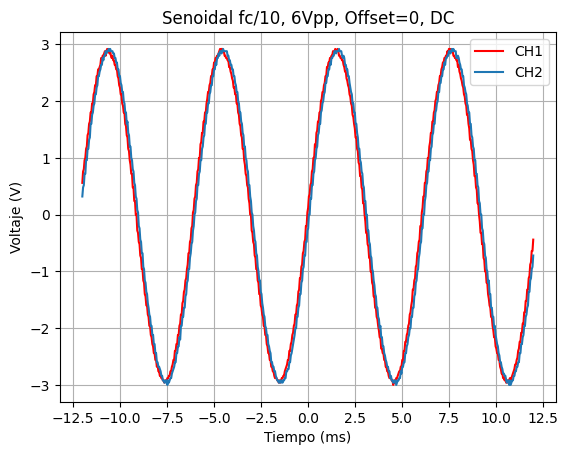

In [201]:
data16 = pd.read_csv("NewFile16.csv", skiprows=1)
data16.drop(data16.columns[3], axis=1, inplace=True)
t = data16.iloc[:,0]*1000
v1 = data16.iloc[:,1]
v2 = data16.iloc[:,2]
# rojo es CH1, azul es CH2
plt.plot(t,v1,color="red",label="CH1")
plt.plot(t,v2,label="CH2")
plt.gca().xaxis.set_major_locator(MultipleLocator(2.5))
plt.xlabel("Tiempo (ms)")
plt.ylabel("Voltaje (V)")
plt.title("Senoidal fc/10, 6Vpp, Offset=0, DC")
plt.legend()
plt.grid(True)
plt.show()

In [202]:
# Atenuación en fc/10
Vpp_CH1 = (np.max(v1)-np.min(v1))
Vpp_CH2 = (np.max(v2)-np.min(v2))
atennuation = 20*np.log10(Vpp_CH2/Vpp_CH1)
print("Atenuación (dB) con f=fc/10:",atennuation)
V1 = np.fft.fft(v1)
V2 = np.fft.fft(v2)
dt = (t[1]-t[0])/1000
f = np.fft.fftfreq(len(t),dt)
f0 = 164.5
idx = np.argmin(np.abs(f-f0))
# Desfase
fase_v1 = np.angle(V1[idx])
fase_v2 = np.angle(V2[idx])
desfase = (fase_v2 - fase_v1)*(180/np.pi)
print(f"Desfase en grados: {desfase:.3f}°")
H_mag = np.empty(5)
H_phs = np.empty(5)
H_mag[0] = atennuation
H_phs[0] = desfase

Atenuación (dB) con f=fc/10: 0.0
Desfase en grados: -5.523°


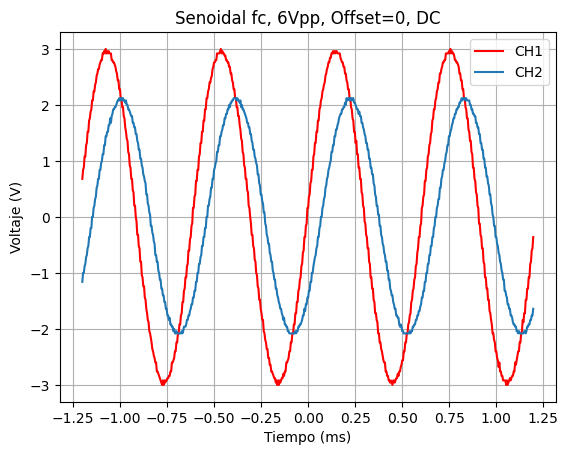

In [203]:
data17 = pd.read_csv("NewFile15.csv", skiprows=1)
data17.drop(data17.columns[3], axis=1, inplace=True)
t = data17.iloc[:,0]*1000
v1 = data17.iloc[:,1]
v2 = data17.iloc[:,2]
# rojo es CH1, azul es CH2
plt.plot(t,v1,color="red",label="CH1")
plt.plot(t,v2,label="CH2")
plt.gca().xaxis.set_major_locator(MultipleLocator(0.25))
plt.xlabel("Tiempo (ms)")
plt.ylabel("Voltaje (V)")
plt.title("Senoidal fc, 6Vpp, Offset=0, DC")
plt.legend()
plt.grid(True)
plt.show()

In [204]:
# Atenuación en fc
Vpp_CH1 = (np.max(v1)-np.min(v1))
Vpp_CH1
Vpp_CH2 = (np.max(v2)-np.min(v2))
Vpp_CH2
atennuation = 20*np.log10(Vpp_CH2/Vpp_CH1)
print("Atenuación (dB) con f=fc:",atennuation)
V1 = np.fft.fft(v1)
V2 = np.fft.fft(v2)
dt = (t[1]-t[0])/1000
f = np.fft.fftfreq(len(t),dt)
f0 = 1645
idx = np.argmin(np.abs(f-f0))
# Desfase
fase_v1 = np.angle(V1[idx])
fase_v2 = np.angle(V2[idx])
desfase = (fase_v2 - fase_v1)*(180/np.pi)
print(f"Desfase en grados: {desfase:.3f}°")
H_mag[2] = atennuation
H_phs[2] = desfase

Atenuación (dB) con f=fc: -3.0980391997148624
Desfase en grados: -44.830°


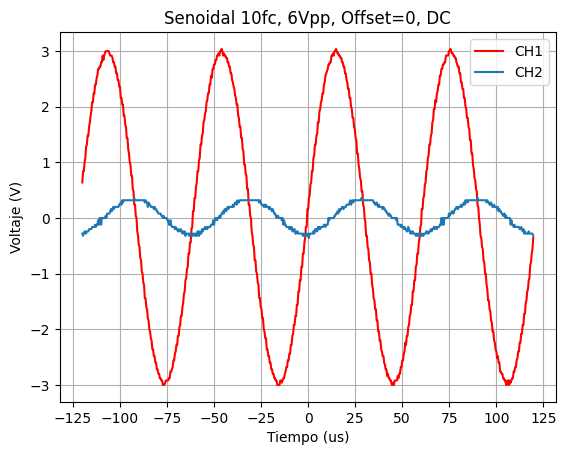

In [205]:
data18 = pd.read_csv("NewFile17.csv", skiprows=1)
data18.drop(data18.columns[3], axis=1, inplace=True)
t = data18.iloc[:,0]*1000000
v1 = data18.iloc[:,1]
v2 = data18.iloc[:,2]
# rojo es CH1, azul es CH2
plt.plot(t,v1,color="red",label="CH1")
plt.plot(t,v2,label="CH2")
plt.gca().xaxis.set_major_locator(MultipleLocator(25))
plt.xlabel("Tiempo (us)")
plt.ylabel("Voltaje (V)")
plt.title("Senoidal 10fc, 6Vpp, Offset=0, DC")
plt.legend()
plt.grid(True)
plt.show()

In [206]:
# Atenuación en 10fc
Vpp_CH1 = (np.max(v1)-np.min(v1))
Vpp_CH2 = (np.max(v2)-np.min(v2))
atennuation = 20*np.log10(Vpp_CH2/Vpp_CH1)
print("Atenuación (dB) con f=10fc:",atennuation)
V1 = np.fft.fft(v1)
V2 = np.fft.fft(v2)
dt = (t[1]-t[0])/1000000
f = np.fft.fftfreq(len(t),dt)
f0 = 16450
idx = np.argmin(np.abs(f-f0))
# Desfase
fase_v1 = np.angle(V1[idx])
fase_v2 = np.angle(V2[idx])
desfase = (fase_v2 - fase_v1)*(180/np.pi)
print(f"Desfase en grados: {desfase:.3f}°")
H_mag[4] = atennuation
H_phs[4] = desfase

Atenuación (dB) con f=10fc: -18.47408884379727
Desfase en grados: -83.935°


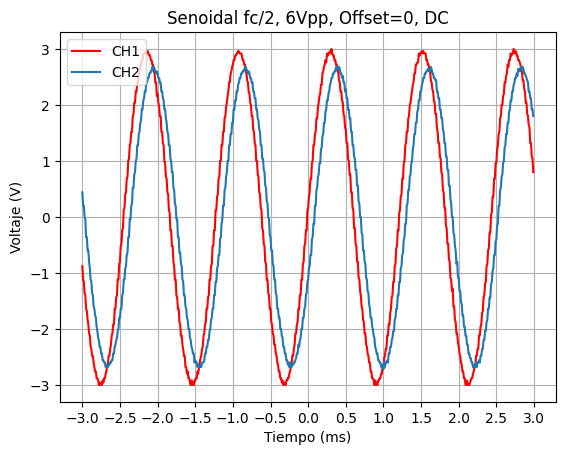

In [207]:
data19 = pd.read_csv("NewFile18.csv", skiprows=1)
data19.drop(data19.columns[3], axis=1, inplace=True)
t = data19.iloc[:,0]*1000
v1 = data19.iloc[:,1]
v2 = data19.iloc[:,2]
# rojo es CH1, azul es CH2
plt.plot(t,v1,color="red",label="CH1")
plt.plot(t,v2,label="CH2")
plt.gca().xaxis.set_major_locator(MultipleLocator(0.5))
plt.xlabel("Tiempo (ms)")
plt.ylabel("Voltaje (V)")
plt.title("Senoidal fc/2, 6Vpp, Offset=0, DC")
plt.legend()
plt.grid(True)
plt.show()

In [208]:
# Atenuación en fc/2
Vpp_CH1 = (np.max(v1)-np.min(v1))
Vpp_CH2 = (np.max(v2)-np.min(v2))
atennuation = 20*np.log10(Vpp_CH2/Vpp_CH1)
print("Atenuación (dB) con f=fc/2:",atennuation)
V1 = np.fft.fft(v1)
V2 = np.fft.fft(v2)
dt = (t[1]-t[0])/1000
f = np.fft.fftfreq(len(t),dt)
f0 = 1645/2
idx = np.argmin(np.abs(f-f0))
# Desfase
fase_v1 = np.angle(V1[idx])
fase_v2 = np.angle(V2[idx])
desfase = (fase_v2 - fase_v1)*(180/np.pi)
print(f"Desfase en grados: {desfase:.3f}°")
H_mag[1] = atennuation
H_phs[1] = desfase

Atenuación (dB) con f=fc/2: -0.9151498112135024
Desfase en grados: -26.340°


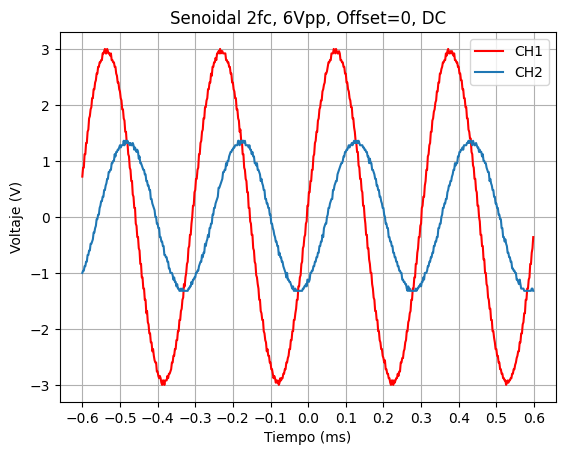

In [209]:
data20 = pd.read_csv("NewFile19.csv", skiprows=1)
data20.drop(data20.columns[3], axis=1, inplace=True)
t = data20.iloc[:,0]*1000
v1 = data20.iloc[:,1]
v2 = data20.iloc[:,2]
# rojo es CH1, azul es CH2
plt.plot(t,v1,color="red",label="CH1")
plt.plot(t,v2,label="CH2")
plt.gca().xaxis.set_major_locator(MultipleLocator(0.1))
plt.xlabel("Tiempo (ms)")
plt.ylabel("Voltaje (V)")
plt.title("Senoidal 2fc, 6Vpp, Offset=0, DC")
plt.legend()
plt.grid(True)
plt.show()

In [210]:
# Atenuación en 2fc
Vpp_CH1 = (np.max(v1)-np.min(v1))
Vpp_CH2 = (np.max(v2)-np.min(v2))
atennuation = 20*np.log10(Vpp_CH2/Vpp_CH1)
print("Atenuación (dB) con f=fc/2:",atennuation)
V1 = np.fft.fft(v1)
V2 = np.fft.fft(v2)
dt = (t[1]-t[0])/1000
f = np.fft.fftfreq(len(t),dt)
f0 = 1645*2
idx = np.argmin(np.abs(f-f0))
# Desfase
fase_v1 = np.angle(V1[idx])
fase_v2 = np.angle(V2[idx])
desfase = (fase_v2 - fase_v1)*(180/np.pi)
print(f"Desfase en grados: {desfase:.3f}°")
H_mag[3] = atennuation
H_phs[3] = desfase

Atenuación (dB) con f=fc/2: -7.000329127097096
Desfase en grados: -63.251°


In [213]:
#vector de magnitudes de la respuesta en frecuencia del filtro
H_mag

array([  0.        ,  -0.91514981,  -3.0980392 ,  -7.00032913,
       -18.47408884])

In [214]:
#vector de fase de la respuesta en frecuencia del filtro
H_phs

array([ -5.52274535, -26.33970133, -44.82961622, -63.25094174,
       -83.93479317])

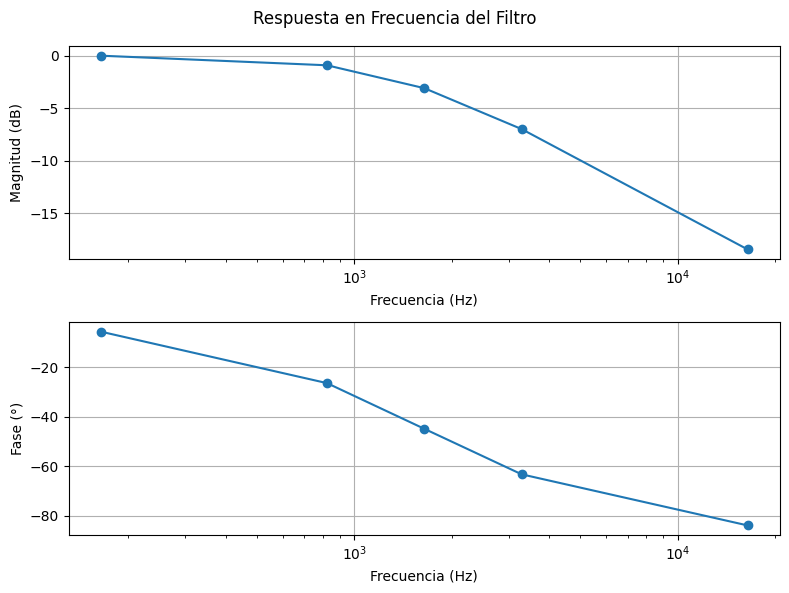

In [227]:
fc = 1645
f = np.array([fc/10, fc/2, fc, fc*2, fc*10])
fig, axs = plt.subplots(2,1,figsize=(8,6))
axs[0].plot(f,H_mag, marker="o")
axs[0].set_xlabel("Frecuencia (Hz)")
axs[0].set_ylabel("Magnitud (dB)")
axs[0].set_xscale("log")
axs[0].grid(True)
axs[1].plot(f,H_phs,marker="o")
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Fase (°)")
axs[1].set_xscale("log")
axs[1].grid(True)
fig.suptitle("Respuesta en Frecuencia del Filtro")
plt.tight_layout()
plt.show()